# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 3

### Parte I: Limpieza de la base

In [ ]:
!pip install openpyxl

In [2]:
# Importamos las librerías a usar

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [93]:
## 0. LECTURA DEL DOCUMENTO
df2024 = pd.read_excel('C:/Users/magda/OneDrive/Documents/GitHub/CC408-T1-5/TP 3/usu_individual_T124.xlsx')
df2004 = pd.read_stata('C:/Users/magda/OneDrive/Documents/GitHub/CC408-T1-5/TP 3/Individual_t104.dta')

#Dirección de Maggie: "C:/Users/magda/OneDrive/Documents/GitHub/CC408-T1-5/TP 3"
#Dirección de Peter: "C:/Users/SAMSUNG/Documents/GitHub/CC408-T1-5/TP 3/usu_individual_T124.xlsx"

KeyboardInterrupt: 

In [104]:
df_2024_GB = df2024[(df2024['AGLOMERADO'] == 33) | (df2024['AGLOMERADO'] == 32)]
df_2004_GB = df2004[(df2004['aglomerado'] == 'Ciudad de Buenos Aires') | (df2004 ['aglomerado'] == 'Partidos del GBA' )]

df_2004_GB.columns = df_2004_GB.columns.str.upper()
df_2024_GB['IPCF'] =df_2024_GB['IPCF'].astype(int)
#df_2024_GB['AGLOMERADO'].unique()
#df_2004_GB['aglomerado'].unique()

C:\Users\magda\AppData\Local\Temp\ipykernel_17256\3212184527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_GB['IPCF'] =df_2024_GB['IPCF'].astype(int)


In [105]:
#diccionarios de cambio
# El diccionario de la base de datos está un poco mal hecho, con diferencia a como se guardan los datos. que malditos
h04 = {
    "Varón": 1,
    "Mujer": 2
}

#Esto no aparece
h06 = {
    'Menos de 1 año': 0,
    '98 y más años': 98
}

#esto aparece con signos de pregunta
h07 = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}

#AGREGAR VARIABLE H15!!

#Esto con mayusculas incosistentes
h08 =    {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': 9,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y planes': 123
}

# 'Secundario incompleto' y en los datos aparece como 'Secuandaria incompleta', así con todo
nivel_ed= {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns/Nr': 9
}

estado = {
    'Entrevista individual no realizada (no respuesta al cuestion': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}

cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7
}

In [106]:
df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
df_2004_GB.loc[:,'CH04'] = df_2004_GB ['CH04'].map(h04).astype(int)
df_2004_GB.loc[:,'CH06'] = df_2004_GB ['CH06'].replace(h06).astype(int)
df_2004_GB.loc[:,'CH07'] = df_2004_GB ['CH07'].map(h07).astype(int)
df_2004_GB.loc[:,'CH08'] = df_2004_GB ['CH08'].map(h08).astype(int)
df_2004_GB.loc[:,'NIVEL_ED'] = df_2004_GB ['NIVEL_ED'].replace(nivel_ed).astype(int)
df_2004_GB.loc[:,'ESTADO'] = df_2004_GB ['ESTADO'].map(estado).astype(int)
df_2004_GB['IPCF'] =df_2004_GB['IPCF'].astype(int)

C:\Users\magda\AppData\Local\Temp\ipykernel_17256\3832139500.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
C:\Users\magda\AppData\Local\Temp\ipykernel_17256\3832139500.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004_GB.loc[:,'CAT_INAC'] = df_2004_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
C:\Users\magda\AppData\Local\Temp\ipykernel_17256\3832139500.py:1: FutureWarning: Setting an item of incompatible d

In [107]:
df_2024_GB.loc[:,'CAT_INAC'] = df_2024_GB ['CAT_INAC'].replace(cat_inac).astype(int) # Tiene 0 a eliminar
df_2024_GB.loc[:,'CH04'] = df_2024_GB ['CH04'].map(h04).astype(int)
df_2024_GB.loc[:,'CH06'] = df_2024_GB ['CH06'].replace(h06).astype(int)
df_2024_GB.loc[:,'CH07'] = df_2024_GB ['CH07'].map(h07).astype(int)
df_2024_GB.loc[:,'CH08'] = df_2024_GB ['CH08'].map(h08).astype(int)
df_2024_GB.loc[:,'NIVEL_ED'] = df_2024_GB ['NIVEL_ED'].replace(nivel_ed).astype(int)
df_2024_GB.loc[:,'ESTADO'] = df_2024_GB ['ESTADO'].map(estado).astype(int)
df_2024_GB['IPCF'] =df_2024_GB['IPCF'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [108]:
lista_valores_matriz = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
for i in lista_valores_matriz:
    print(df_2004_GB[i].unique())

[1 2]
[79 67 74 54 51 25 20 55 48 17 15 77 50 49 26 22 18 86 62 76 45 41 21 31
 19 52 12 32 29 64 10 47 43 13  3 46 78 60 59 37 44 30 63 71 87 34 14 24
 28 27 69 56 33 66 61  1 92  0 65 57 23  4 40 16  9 83  6 38 75 11 53 73
 39 35  7  5 36  8 82 85 72 70 89 42  2 58 68 81 80 93 96 84 90 94 88 98]
[4 3 2 5 1]
[ 1  4  2 12  3  9 23]
[3 2 6 5 4 1 7]
[3 1 2 4 0]
[1 0 4 3 5 2 7 6]
[  368     0   440   532   208   150   735  1035  1438   566   900  3000
   180  3620   311    68   280   940   250  1600   325   506   540  2400
   400   390   425  1325   433   875  1000    50   575  1150  1175  2950
   266   529   391   550   520   420   350   200   262   302   525   715
   170   625   500    75  2850  1800   100   783   267   125  1700   750
   300   233   823   247  1167   450   670   975  1900   232   680  1577
   569   610  1165   700   162   466   230  1442   860   605   555   530
   270   560    71  2800   327   660   104  1440   678   533   255   600
  2100   151   241  1050  1040    64

In [109]:
lista_valores_matriz = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
for i in lista_valores_matriz:
    print(df_2004_GB[i].unique())

[1 2]
[79 67 74 54 51 25 20 55 48 17 15 77 50 49 26 22 18 86 62 76 45 41 21 31
 19 52 12 32 29 64 10 47 43 13  3 46 78 60 59 37 44 30 63 71 87 34 14 24
 28 27 69 56 33 66 61  1 92  0 65 57 23  4 40 16  9 83  6 38 75 11 53 73
 39 35  7  5 36  8 82 85 72 70 89 42  2 58 68 81 80 93 96 84 90 94 88 98]
[4 3 2 5 1]
[ 1  4  2 12  3  9 23]
[3 2 6 5 4 1 7]
[3 1 2 4 0]
[1 0 4 3 5 2 7 6]
[  368     0   440   532   208   150   735  1035  1438   566   900  3000
   180  3620   311    68   280   940   250  1600   325   506   540  2400
   400   390   425  1325   433   875  1000    50   575  1150  1175  2950
   266   529   391   550   520   420   350   200   262   302   525   715
   170   625   500    75  2850  1800   100   783   267   125  1700   750
   300   233   823   247  1167   450   670   975  1900   232   680  1577
   569   610  1165   700   162   466   230  1442   860   605   555   530
   270   560    71  2800   327   660   104  1440   678   533   255   600
  2100   151   241  1050  1040    64

In [102]:
#CREO QUE ESTE ES EL COGIDO QUE BORRA VALORES DE ESTADO... 
# valores_validos = {
#     'CH04': [1,2],
#     'CH07': [1,2,3,4,5],
#     'CH08': [1,2,3,4,9,12,13,23,123],
#     'NIVEL_ED': [1,2,3,4,5,6,7,8,9],
#     'ESTADO': [0,1,2,3,4],
#     'CAT_INAC': [1,2,3,4,5,6,7]
# }

# for col in valores_validos.keys():
#     df_2024_GB = df_2024_GB[df_2024_GB[col].isin(valores_validos[col])]

In [110]:
df_2024_GB["ESTADO"]

245      1
246      1
247      1
255      1
256      3
        ..
46045    1
46046    0
46047    0
46048    0
46049    0
Name: ESTADO, Length: 7051, dtype: int64

In [54]:
# valores_validos = {
#     'CH04': [1,2],
#     'CH07': [1,2,3,4,5],
#     'CH08': [1,2,3,4,9,12,13,23,123],
#     'NIVEL_ED': [1,2,3,4,5,6,7,8,9],
#     'ESTADO': [0,1,2,3,4],
#     'CAT_INAC': [1,2,3,4,5,6,7]
# }

# for col in valores_validos.keys():
#     df_2004_GB = df_2004_GB[df_2004_GB[col].isin(valores_validos[col])]

In [111]:
lista_valores_matriz = ['CH04',  'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'] #'CH06' Y 'IPCF' quedan excluidos porque tiene condiciones de min y max
for i in lista_valores_matriz:
    datos = df_2024_GB[i].unique()
    print ('los valores de ', i, 'son:', datos)

# CH04 BIEN
# CH06 MAL: TIENE -1
# CH07 MAL: TIENE 9 
# EL DE ESTADO ESTA MAL. VA DE 0 A 4. 

los valores de  CH04 son: [2 1]
los valores de  CH07 son: [4 2 5 3 9 1]
los valores de  CH08 son: [ 1  4  2  9 12 23 13  3]
los valores de  NIVEL_ED son: [2 6 1 4 3 7 5]
los valores de  ESTADO son: [1 3 4 0 2]
los valores de  CAT_INAC son: [0 1 3 5 4 7 6 2]


In [112]:
lista_valores_matriz = ['CH04',  'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'] #'CH06' Y 'IPCF' quedan excluidos porque tiene condiciones de min y max
for i in lista_valores_matriz:
    datos = df_2004_GB[i].unique()
    print ('los valores de ', i, 'son:', datos)

# CH04 BIEN
# CH06 MAL: TIENE -1
# CH07 MAL: TIENE 9 
# EL DE ESTADO ESTA MAL. VA DE 0 A 4. 

los valores de  CH04 son: [1 2]
los valores de  CH07 son: [4 3 2 5 1]
los valores de  CH08 son: [ 1  4  2 12  3  9 23]
los valores de  NIVEL_ED son: [3 2 6 5 4 1 7]
los valores de  ESTADO son: [3 1 2 4 0]
los valores de  CAT_INAC son: [1 0 4 3 5 2 7 6]


In [113]:
df2004["estado"]

0                Inactivo
1                 Ocupado
2                Inactivo
3                 Ocupado
4                Inactivo
               ...       
45284             Ocupado
45285             Ocupado
45286            Inactivo
45287    Menor de 10 años
45288    Menor de 10 años
Name: estado, Length: 45289, dtype: category
Categories (5, object): ['Entrevista individual no realizada (no respue... < 'Ocupado' < 'Desocupado' < 'Inactivo' < 'Menor de 10 años']

In [114]:
df_2004_GB["ESTADO"]

0       3
1       1
2       3
3       1
4       3
       ..
7642    4
7643    1
7644    1
7645    3
7646    1
Name: ESTADO, Length: 7647, dtype: int32

In [115]:
#Merge

df_GB = pd.concat([df_2024_GB, df_2004_GB])

In [116]:
df_2004_GB

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [61]:
df_2024_GB

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
277,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1,2,1,1,S,33,1866,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
278,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1,3,0,1,S,33,1866,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
403,TQRMNOPWQHMKRLCDEIJAH00801957,2024,1,1,1,1,1,S,33,590,...,NaN,1,135000,4,NaN,4,4.0,NaN,4,598
405,TQRMNOQURHKLSPCDEIJAH00856901,2024,1,1,2,1,1,S,33,2958,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46033,TQRMNOQVWHLKLOCDEIIAD00854956,2024,1,1,3,0,1,S,32,2074,...,NaN,2,88333,2,NaN,2,2.0,NaN,1,2588
46037,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1,4,1,1,S,32,590,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
46038,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1,5,1,1,S,32,590,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
46039,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1,6,1,1,S,32,590,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0


### Parte II: Visualizaciones

In [117]:
df_GB

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
255,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,2004.0,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
7643,288405,2004.0,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
7644,288405,2004.0,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
7645,288405,2004.0,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [118]:
# #COMPOSICIÓN POR SEXO PARA 2004 Y 2024
# #CH04: Sexo. 1=Varón, 2=Mujer
# #ANO4: Año (2004, 2024)

print("2004", df_2004_GB['CH04'].value_counts(1))
print("2024", df_2024_GB['CH04'].value_counts(1))

# ax = df_2004_GB[['CH04']].plot(kind='bar', title ="Composición por sexo para 2004 y 2024", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Año", fontsize=12)
# ax.set_ylabel("Cantidad", fontsize=12)
# plt.show() 


2004 CH04
2    0.528966
1    0.471034
Name: proportion, dtype: float64
2024 CH04
2    0.521912
1    0.478088
Name: proportion, dtype: float64


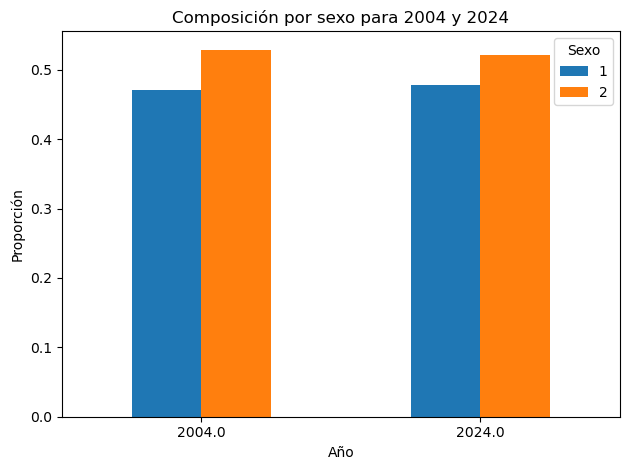

In [119]:
# Calcular el conteo de cada sexo por año
count_sex = df_GB.groupby(['ANO4', 'CH04']).size().unstack(fill_value=0)

# Calcular las proporciones
proportions = count_sex.div(count_sex.sum(axis=1), axis=0)

# Crear el gráfico de barras
proportions.plot(kind='bar')

# Personalizar el gráfico
plt.title('Composición por sexo para 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.legend(title='Sexo')
plt.xticks(rotation=0)
#plt.bar_label()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

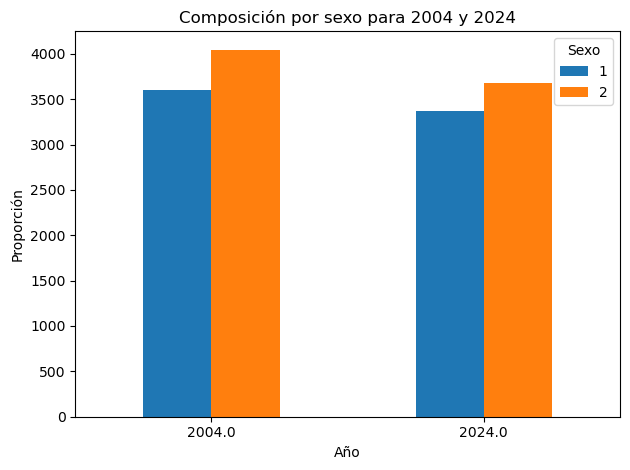

In [120]:
# Calcular el conteo de cada sexo por año
count_sex = df_GB.groupby(['ANO4', 'CH04']).size().unstack(fill_value=0)

# Calcular las proporciones
proportions = count_sex.div(count_sex.sum(axis=1), axis=0)

# Crear el gráfico de barras
count_sex.plot(kind='bar')

# Personalizar el gráfico
plt.title('Composición por sexo para 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.legend(title='Sexo')
plt.xticks(rotation=0)
#plt.bar_label()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# #MATRIZ DE CORRELACIÓN
# df = pd.DataFrame(
#     {
#         "Day 1": [7, 1, 5, 6, 3, 10, 5, 8],
#         "Day 2": [1, 2, 8, 4, 3, 9, 5, 2],
#         "Day 3": [4, 6, 5, 8, 6, 1, 2, 3],
#         "Day 4": [5, 8, 9, 5, 1, 7, 8, 9],
#     }
# )

# upp_mat = np.triu(df.corr())

# sns.heatmap(df.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", mask=upp_mat)

In [121]:
#COUNT: DESOCUPADOS, INACTIVOS, OCUPADOS 

print("Estado 2004:", df_2004_GB["ESTADO"].value_counts())
 
print("Estado 2024:", df_2024_GB["ESTADO"].value_counts()) #ACA HAY ALGO RARO PORQUE LOS VALORES TENDRIAN Q IR D 0 A 4. 

Estado 2004: ESTADO
1    3079
3    2800
4    1230
2     528
0      10
Name: count, dtype: int64
Estado 2024: ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64


In [123]:
#INGRESO PER CÁPITA FAMILIAR SEGÚN ESTADO (OCUPADO, DESOCUPADO, INACTIVO)
#IPCF: Monto de ingreso per capita familiar percibido
#ESTADO: 0 = Entrevista individual no realizada (no respuesta al cuestionario individual)
    # 1 = Ocupado
    # 2 = Desocupado
    # 3 = Inactivo
    # 4 = Menor de 10 años

df_GB["IPCF"].groupby(df_GB["ESTADO"]).describe()


,count,mean,std,min,25%,50%,75%,max
ESTADO,,,,,,,,
0,51.0,10.294118,46.622867,0.0,0.0,0.0,0.0,294.0
1,6303.0,106443.281295,382731.337327,0.0,50.0,337.0,79800.0,11312333.0
2,839.0,31655.797378,81410.436494,0.0,65.0,183.0,705.0,908750.0
3,5462.0,63862.957342,175238.209647,0.0,66.0,251.0,66750.0,5875000.0
4,2043.0,41675.026432,123001.677718,0.0,58.0,183.0,1066.5,1733333.0


In [124]:
#ARMAR BASE DE RESPONDIERON Y NO RESPONDIERON

respondieron= df_GB.loc[(df_GB["ESTADO"]>0)]

norespondieron = df_GB.loc[(df_GB["ESTADO"]==0)] #10 personas no respondieron. 

def det_pea(estado): 
    return 1 if estado in [1,2] else 0

respondieron["PEA"]= respondieron["ESTADO"].apply(det_pea)

def det_pet(edad): 
    return 1 if 15 <= edad <= 65 else 0

respondieron["PET"]= respondieron["CH06"].apply(det_pet)

def det_deso(estado): 
    return 1 if estado == 2 else 0

respondieron["desocupado"]= respondieron["ESTADO"].apply(det_deso)


C:\Users\magda\AppData\Local\Temp\ipykernel_17256\849121505.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron["PEA"]= respondieron["ESTADO"].apply(det_pea)
C:\Users\magda\AppData\Local\Temp\ipykernel_17256\849121505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron["PEA"]= respondieron["ESTADO"].apply(det_pea)
C:\Users\magda\AppData\Local\Temp\ipykernel_17256\849121505.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

In [125]:
respondieron["desocupado"].value_counts()

desocupado
0    13808
1      839
Name: count, dtype: int64

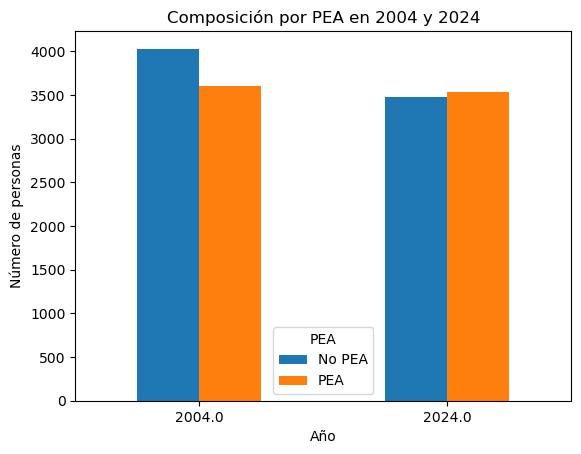

Total PET: 9568
Total PEA: 7142


In [126]:
# Agrupar datos por año y PEA
resultados = respondieron.groupby(['ANO4', 'PEA']).size().unstack(fill_value=0)

# Crear gráfico de barras
resultados.plot(kind='bar')
plt.title('Composición por PEA en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.legend(['No PEA', 'PEA'], title='PEA')
plt.show()

# Comparar PET y PEA
total_pet = respondieron['PET'].sum()
total_pea = respondieron['PEA'].sum()

print(f'Total PET: {total_pet}')
print(f'Total PEA: {total_pea}')